<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Income_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('income_evaluation.csv')
df.isnull().any()

,0
age,False
workclass,False
fnlwgt,False
education,False
education-num,False
marital-status,False
occupation,False
relationship,False
race,False
sex,False


In [2]:

df = df.rename(columns={'age': 'age',
                         ' workclass': 'workclass',
                         ' fnlwgt': 'final_weight',
                         ' education': 'education',
                         ' education-num': 'education_num',
                         ' marital-status': 'marital_status',
                         ' occupation': 'occupation',
                         ' relationship': 'relationship',
                         ' race': 'race',
                         ' sex': 'sex',
                         ' capital-gain': 'capital_gain',
                         ' capital-loss': 'capital_loss',
                         ' hours-per-week': 'hrs_per_week',
                         ' native-country': 'native_country',
                         ' income': 'income'
                        })
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

In [3]:
df['income'].unique()
df['income_encoded'] = [1 if value == ' >50K' else 0 for value in df['income'].values]
df['income_encoded'].unique()
# Let's check some descriptive statistics
df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hrs_per_week,income_encoded
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


<Axes: ylabel='occupation'>

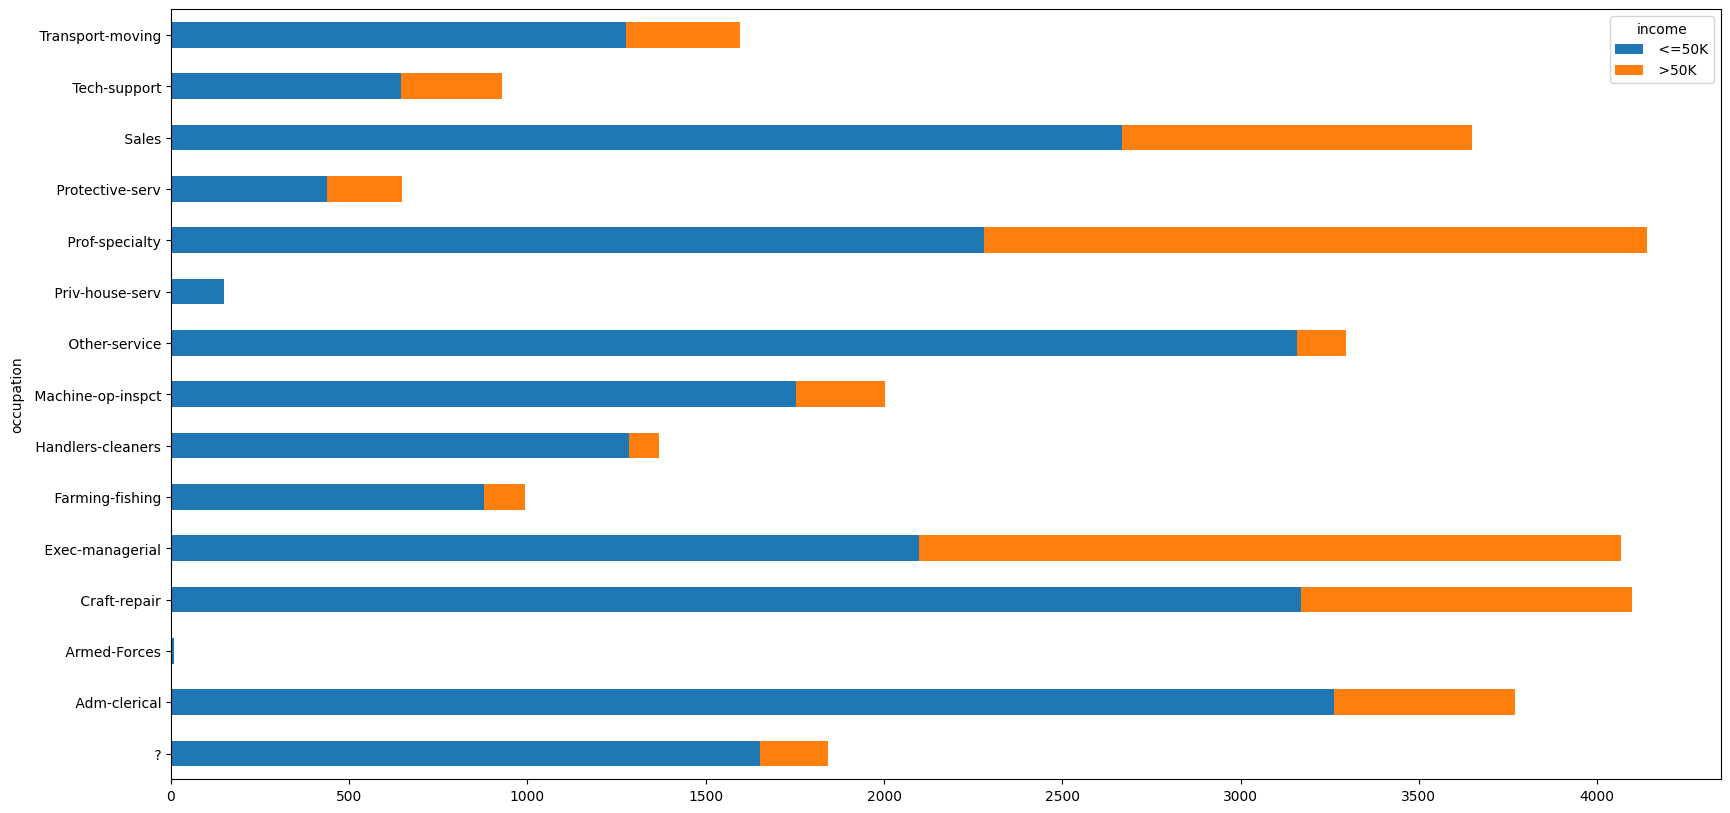

In [4]:
df[df['income'] == ' >50K']['occupation'].value_counts().head(3)
pd.crosstab(df["occupation"], df['income']).plot(kind='barh', stacked=True, figsize=(20, 10))